# EDA

The first most important step in data analysis is to perform a exploratory data analysis (EDA). EDA involves inspecting for null and duplicate values, data preprocessing, assessing distribution of each variable and identifying simple trends between variables. Depending on the complexity of the datasets, data scientists can spend between 50%-90% of the time performing EDA, to ensure that the data is properly processed for further in-depth analysis.

EDA is useful is when deciding on the appropriate statistics to use. Importantly, the statistical tests used for variables with Gaussian distribution will be different from another dataset where the distribution may be skewed. 

Finally, the strength of correlation between different variables can provide insights for machine learning, where features with poor correlation or almost prefect correlation can be removed from further analysis. 

Overall, EDA provides critical insights into the general structure and characteristics of the dataset, which will be useful for further downstream analysis and machine learning.

### An EDA checklist
If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset.

#### An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



In [19]:
df = pd.read_csv('data.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
309,31.0,No,Travel_Rarely,691,Research & Development,5.0,4,Technical Degree,1,423,...,3,80,1,6,4,3,5,2,0,3
1413,30.0,No,Travel_Rarely,911,Research & Development,1.0,2,Medical,1,1989,...,3,80,0,12,6,2,12,8,1,7
867,40.0,No,Travel_Frequently,1184,Sales,2.0,4,Medical,1,1212,...,4,80,3,5,2,3,0,0,0,0
616,27.0,No,Non-Travel,443,Research & Development,3.0,3,Medical,1,850,...,3,80,3,0,6,2,0,0,0,0
41,27.0,No,Travel_Rarely,1240,Research & Development,2.0,4,Life Sciences,1,54,...,4,80,1,1,6,3,1,0,0,0


In [24]:
# !pip install pandas-profiling
# 

In [25]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file = "output.html")

In [26]:
df.head() #first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df.shape

(1471, 35)

In [28]:
df.head(2) 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [29]:
df.tail(3) #last 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1470,34.0,No,Travel_Rarely,628,Research & Development,8.0,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [30]:
#last 10 row
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1461,29.0,No,Travel_Rarely,468,Research & Development,28.0,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1462,50.0,Yes,Travel_Rarely,410,Sales,28.0,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1463,39.0,No,Travel_Rarely,722,Sales,24.0,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1464,31.0,No,Non-Travel,325,Research & Development,5.0,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1465,26.0,No,Travel_Rarely,1167,Sales,5.0,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1470,34.0,No,Travel_Rarely,628,Research & Development,8.0,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [31]:
df.index #checking the index

RangeIndex(start=0, stop=1471, step=1)

## General description

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1469 non-null   float64
 1   Attrition                 1469 non-null   object 
 2   BusinessTravel            1471 non-null   object 
 3   DailyRate                 1471 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1471 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1471 non-null   int64  
 9   EmployeeNumber            1471 non-null   int64  
 10  EnvironmentSatisfaction   1471 non-null   int64  
 11  Gender                    1471 non-null   object 
 12  HourlyRate                1471 non-null   int64  
 13  JobInvolvement            1471 non-null   int64  
 14  JobLevel

In [33]:
df.shape

(1471, 35)

In [38]:
df.describe() #numercial 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1469.000000,1471.000000,1470.000000,1471.000000,1471.0,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,...,1471.000000,1471.0,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,36.917631,802.726717,9.177551,2.913664,1.0,1024.467709,2.720598,65.903467,2.728756,2.063222,...,2.713120,80.0,0.793338,11.275323,2.800136,2.760707,7.005438,4.227736,2.187627,4.121686
std,9.136679,403.477720,8.099814,1.024209,0.0,602.012697,1.093632,20.327996,0.712748,1.106911,...,1.081362,0.0,0.852038,7.779858,1.289212,0.706514,6.125333,3.622371,3.221338,3.567352
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,489.500000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1019.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.500000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [235]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1469,1471,1470,1470,1471,1471,1471,1471,1471
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1232,1044,961,605,883,326,674,1471,1054


In [236]:
df.describe(include=['bool','object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1469,1471,1470,1470,1471,1471,1471,1471,1471
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1232,1044,961,605,883,326,674,1471,1054


In [237]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [39]:
df.columns.str.strip()
#The str.strip() function is used to remove leading and trailing characters.
#Strip whitespaces (including newlines)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [40]:
s = pd.Series(['1. Bat.  ', '2. Dog!\n', '3. fox?\t','4.Cat\t' ,np.nan])
s
#a set of specified characters from each string in the Series/Index from left and right sides.

0    1. Bat.  
1    2. Dog!\n
2    3. fox?\t
3      4.Cat\t
4          NaN
dtype: object

In [41]:
(" ","")

(' ', '')

In [241]:
s.str.strip('1234.!? \n\t ')

0    Bat
1    Dog
2    fox
3    Cat
4    NaN
dtype: object

In [242]:
# $

In [243]:
s = pd.Series(['1. Bat cy', '2. Dog cy', '3. fox cy',np.nan])
s1=s.str.replace("cy","")
s1

0    1. Bat 
1    2. Dog 
2    3. fox 
3        NaN
dtype: object

In [244]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### What kind of data do you have and how to treat different types?
Let’s separate the features (columns) out into three boxes, numerical, categorical and not sure.


In [42]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [44]:
df_obj = df.select_dtypes(['object'])
df_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,NaN,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1466,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1468,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1469,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [45]:
df_int = df.select_dtypes(['int'])
df_int

,DailyRate,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,2,1,1,2,94,3,2,4,5993,...,1,80,0,8,0,1,6,4,0,5
1,279,1,1,2,3,61,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
2,1373,2,1,4,4,92,2,1,3,2090,...,2,80,0,7,3,3,0,0,0,0
3,1392,4,1,5,4,56,3,1,3,2909,...,3,80,0,8,3,3,8,7,3,0
4,591,1,1,7,1,40,3,1,2,3468,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,884,2,1,2061,3,41,4,2,4,2571,...,3,80,1,17,3,3,5,2,0,3
1467,613,1,1,2062,4,42,2,3,1,9991,...,1,80,1,9,5,3,7,7,1,7
1468,155,3,1,2064,2,87,4,2,2,6142,...,2,80,1,6,0,3,6,2,0,3
1469,1023,3,1,2065,4,63,2,2,2,5390,...,4,80,0,17,3,2,9,6,0,8


age 
percentile( 4 =100/4) 0 25 50 75 100% 
(5, 100/5) 0 20 40 60 80 100

customised bin
0-10 10-25 25-40 40-80 80-90 90-100% 



In [46]:
df["Age"].unique()

array([41., 49., 37., 33., 27., 32., 59., 30., 38., 36., 35., 29., 31.,
       34., 28., nan, 22., 53., 24., 21., 42., 44., 46., 39., 43., 50.,
       26., 48., 55., 45., 56., 23., 51., 40., 54., 58., 20., 25., 19.,
       57., 52., 47., 18., 60.])

In [47]:
df["Age"].nunique()

43

In [250]:
for column in df:
    print("Column"," ",column,"  uniquevalus  are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")

Column   Age   uniquevalus  are : 43
[41. 49. 37. 33. 27. 32. 59. 30. 38. 36. 35. 29. 31. 34. 28. nan 22. 53.
 24. 21. 42. 44. 46. 39. 43. 50. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60.]
-------------------------
Column   Attrition   uniquevalus  are : 2
[nan 'No' 'Yes']
-------------------------
Column   BusinessTravel   uniquevalus  are : 3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------
Column   DailyRate   uniquevalus  are : 886
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  

In [251]:
for column in df:
    print("Column"," ",column," value counts is :", df[column].info())
    print("-------------------------------------------------------")


<class 'pandas.core.series.Series'>
RangeIndex: 1471 entries, 0 to 1470
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
1469 non-null   float64
dtypes: float64(1)
memory usage: 11.6 KB
Column   Age  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1471 entries, 0 to 1470
Series name: Attrition
Non-Null Count  Dtype 
--------------  ----- 
1469 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB
Column   Attrition  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1471 entries, 0 to 1470
Series name: BusinessTravel
Non-Null Count  Dtype 
--------------  ----- 
1471 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB
Column   BusinessTravel  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1471 entries, 0 to 1470
Series name: Da

In [252]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [253]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    345
4    153
1     80
Name: count, dtype: int64

In [254]:
for column in df:
    print("Column ",column," value counts is :", df[column].value_counts())
    print("-------------------------------------------------------")

Column  Age  value counts is : Age
35.0    78
34.0    77
36.0    69
31.0    69
29.0    67
32.0    61
30.0    60
33.0    58
38.0    58
40.0    57
37.0    50
28.0    49
27.0    48
42.0    46
39.0    42
41.0    40
45.0    40
26.0    39
44.0    33
46.0    33
43.0    32
50.0    30
25.0    26
24.0    26
49.0    24
47.0    24
55.0    22
51.0    19
53.0    19
48.0    19
54.0    18
52.0    18
22.0    16
56.0    14
23.0    14
58.0    14
21.0    13
20.0    11
59.0    10
19.0     9
18.0     8
60.0     5
57.0     4
Name: count, dtype: int64
-------------------------------------------------------
Column  Attrition  value counts is : Attrition
No     1232
Yes     237
Name: count, dtype: int64
-------------------------------------------------------
Column  BusinessTravel  value counts is : BusinessTravel
Travel_Rarely        1044
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
-------------------------------------------------------
Column  DailyRate  value counts is : Dai

## checking missing data

In [48]:
df['Attrition'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
1466    False
1467    False
1468    False
1469    False
1470    False
Name: Attrition, Length: 1471, dtype: bool

In [49]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isna().sum() #-----------> also use this function df.isnull().sum()

Age                         2
Attrition                   2
BusinessTravel              0
DailyRate                   0
Department                  1
DistanceFromHome            1
Education                   0
EducationField              1
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
df1copy = df.copy() #--------<> copy the dataframe to the another variable

In [52]:
df1copy.isnull().sum()

Age                         2
Attrition                   2
BusinessTravel              0
DailyRate                   0
Department                  1
DistanceFromHome            1
Education                   0
EducationField              1
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [53]:
df1copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1469 non-null   float64
 1   Attrition                 1469 non-null   object 
 2   BusinessTravel            1471 non-null   object 
 3   DailyRate                 1471 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1471 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1471 non-null   int64  
 9   EmployeeNumber            1471 non-null   int64  
 10  EnvironmentSatisfaction   1471 non-null   int64  
 11  Gender                    1471 non-null   object 
 12  HourlyRate                1471 non-null   int64  
 13  JobInvolvement            1471 non-null   int64  
 14  JobLevel

In [261]:
for column in df:
    print( "column name:", column, "- misisng values ",df[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: Age - misisng values  2
------------------------------------------------------------------
column name: Attrition - misisng values  2
------------------------------------------------------------------
column name: BusinessTravel - misisng values  0
------------------------------------------------------------------
column name: DailyRate - misisng values  0
------------------------------------------------------------------
column name: Department - misisng values  1
------------------------------------------------------------------
column name: DistanceFromHome - misisng values  1
------------------------------------------------------------------
column name: Education - misisng values  0
------------------------------------------------------------------
column name: EducationField - misisng values  1
------------------------------------------------------------------
column name: EmployeeCount - misisng values  0
-------------------------------------------------------------

In [54]:
def data(data):
    print("-----------All columns Labels----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------")  

In [55]:
data(df)

-----------All columns Labels----------
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   A

In [56]:
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [57]:
df['Attrition']=='No'

0       False
1        True
2       False
3        True
4        True
        ...  
1466     True
1467     True
1468     True
1469     True
1470     True
Name: Attrition, Length: 1471, dtype: bool

##### Aggregate Statistics (Groupby)

In [266]:
df[df['Attrition']=='Yes'] #how many rows had no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28.0,Yes,Travel_Rarely,103,Research & Development,NaN,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36.0,Yes,Travel_Rarely,1218,Sales,9.0,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34.0,Yes,Travel_Rarely,699,Research & Development,6.0,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
26,32.0,Yes,Travel_Frequently,1125,Research & Development,16.0,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,23.0,Yes,Travel_Frequently,638,Sales,9.0,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1443,29.0,Yes,Travel_Rarely,1092,Research & Development,1.0,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1445,56.0,Yes,Travel_Rarely,310,Research & Development,7.0,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1453,50.0,Yes,Travel_Frequently,878,Sales,1.0,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [267]:
df[(df['BusinessTravel']=='Travel_Frequently')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32.0,No,Travel_Frequently,1005,Research & Development,2.0,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
8,38.0,No,Travel_Frequently,216,Research & Development,23.0,3,NaN,1,12,...,2,80,0,10,2,3,9,7,1,8
26,32.0,Yes,Travel_Frequently,1125,Research & Development,16.0,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,36.0,No,Travel_Frequently,688,Research & Development,4.0,2,Life Sciences,1,2025,...,2,80,3,18,3,3,4,2,0,2
1453,50.0,Yes,Travel_Frequently,878,Sales,1.0,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1
1457,35.0,No,Travel_Frequently,1199,Research & Development,18.0,4,Life Sciences,1,2049,...,4,80,2,10,2,4,10,2,0,2
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3


In [268]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Groupby the column

In [73]:
df.groupby(['Age']).mean(numeric_only=True)

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
18.0,747.625000,6.125000,2.500000,1.0,1053.625000,2.750000,68.125000,2.875000,1.000000,3.250000,...,3.125000,80.0,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000
19.0,548.444444,10.555556,2.111111,1.0,675.666667,2.444444,63.555556,2.444444,1.000000,2.555556,...,2.888889,80.0,0.000000,0.888889,3.000000,3.222222,0.777778,0.222222,0.111111,0.111111
20.0,819.454545,7.090909,2.636364,1.0,1021.000000,3.181818,61.909091,2.636364,1.000000,2.636364,...,2.363636,80.0,0.000000,1.545455,2.727273,2.909091,1.545455,1.000000,0.636364,1.181818
21.0,762.846154,9.076923,1.615385,1.0,951.538462,2.692308,67.307692,2.692308,1.000000,2.692308,...,2.692308,80.0,0.000000,1.923077,3.538462,2.769231,1.846154,1.230769,1.076923,1.076923
22.0,806.937500,8.437500,1.812500,1.0,869.250000,2.812500,69.812500,2.750000,1.125000,2.937500,...,2.250000,80.0,0.750000,2.687500,3.062500,2.750000,2.062500,1.312500,0.937500,1.312500
23.0,707.928571,9.142857,1.857143,1.0,1225.500000,2.857143,66.071429,3.214286,1.071429,2.428571,...,2.714286,80.0,0.785714,3.357143,2.642857,2.928571,2.642857,1.714286,0.500000,1.642857
24.0,863.115385,11.884615,2.115385,1.0,1011.384615,2.500000,62.615385,2.807692,1.269231,2.769231,...,2.769231,80.0,1.115385,4.153846,2.692308,2.769231,3.346154,1.884615,0.884615,1.692308
25.0,768.076923,8.769231,1.923077,1.0,1005.307692,2.538462,65.961538,2.846154,1.500000,2.692308,...,2.846154,80.0,0.769231,5.269231,3.038462,2.769231,3.846154,2.692308,0.884615,2.615385
26.0,844.769231,10.230769,2.641026,1.0,981.051282,2.384615,62.384615,2.564103,1.307692,2.769231,...,2.538462,80.0,0.717949,5.615385,2.897436,2.666667,4.692308,3.666667,1.641026,3.000000


In [74]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [77]:

#groupby attrition and work life balance ---------------------> only groupby one column and use the mean of the data
gbwb=df.groupby(['WorkLifeBalance'])['HourlyRate'].mean(numeric_only=True)
gbwb

WorkLifeBalance
1    63.800000
2    66.553623
3    66.090705
4    64.444444
Name: HourlyRate, dtype: float64

In [78]:
#groupby attrition and work life balance ---------------------> only groupby two column and use the mean of the data
df.groupby(['YearsInCurrentRole'])[['Age','HourlyRate']].mean(numeric_only=True)

,Age,HourlyRate
YearsInCurrentRole,,
0,35.065574,66.581967
1,35.035088,70.982456
2,35.485255,66.209115
3,36.570370,64.237037
4,37.346154,65.817308
5,34.111111,70.833333
6,41.621622,63.972973
7,37.725225,64.788288
8,37.606742,63.483146


In [79]:
def cus_fnt():
    pass

In [80]:

dfgf=pd.DataFrame(df.groupby(['JobRole']).agg({'Age':[np.mean,np.std],'HourlyRate':[np.mean,'count'],'Education':'nunique'}))
dfgf

Age           HourlyRate       Education
                                mean       std       mean count   nunique
JobRole                                                                  
Healthcare Representative  39.809160  8.200483  66.839695   131         5
Human Resources            35.500000  7.937254  64.173077    52         5
Laboratory Technician      34.054264  8.408177  66.683398   259         5
Manager                    46.764706  6.941305  66.833333   102         5
Manufacturing Director     38.361111  8.617441  65.006897   145         5
Research Director          44.000000  7.923687  63.762500    80         5
Research Scientist         34.215017  8.585480  66.767918   293         5
Sales Executive            36.889571  8.092546  65.438650   326         5
Sales Representative       30.361446  8.513373  64.337349    83         4

In [81]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [83]:
df['index_backwards'] = range(len(df), 0, -1)
df['index_backwards']

0       1471
1       1470
2       1469
3       1468
4       1467
        ... 
1466       5
1467       4
1468       3
1469       2
1470       1
Name: index_backwards, Length: 1471, dtype: int64

In [84]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1471
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,1470
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1469
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1468
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,5
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,4
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,2


In [85]:
df.Age.min()

18.0

In [86]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1471
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,1470
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1469
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1468
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,5
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,4
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,2


In [87]:
df.Age.max()

60.0

# qcut method
qcut= The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

he simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data. In the example below, we tell pandas to create 4 equal sized groupings of the data.

in each case, there are an equal number of observations in each bin. Pandas does the math behind the scenes to figure out how wide to make each bin.
One important item to keep in mind when using qcut is that the quantiles must all be less than 1. Here are some examples of distributions. In most cases it’s simpler to just define q as an integer:

terciles: q=[0, 1/3, 2/3, 1] or q=3
quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6

One question you might have is, how do I know what ranges are used to identify the different bins? You can use retbins=True to return the bin labels. Here’s a handy snippet of code to build a quick reference table:

there is one more potential way that we can label our bins. Instead of the bin ranges or custom labels, we can return integers by passing labels=False

In [88]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1471
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,1470
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1469
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1468
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,5
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,4
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,3
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,2


In [90]:
df["Age"]


0       41.0
1       49.0
2       37.0
3       33.0
4       27.0
        ... 
1466    36.0
1467    39.0
1468    27.0
1469    49.0
1470    34.0
Name: Age, Length: 1471, dtype: float64

0........20
q = 5

(0 - 4]
(4 - 8]
(8 - 12]
(12 - 16]
(16 - 20]

In [171]:
#breakdown according to quantile ---------------> we call it qurtile, ranges, class intervel ,  q = categories
df['Agerange1']=pd.qcut(df["Age"],q=4)
print(df[['Age','Agerange1']])


       Age       Agerange1
0     41.0    (36.0, 43.0]
1     49.0    (43.0, 60.0]
2     37.0    (36.0, 43.0]
3     33.0    (30.0, 36.0]
4     27.0  (17.999, 30.0]
...    ...             ...
1466  36.0    (30.0, 36.0]
1467  39.0    (36.0, 43.0]
1468  27.0  (17.999, 30.0]
1469  49.0    (43.0, 60.0]
1470  34.0    (30.0, 36.0]

[1470 rows x 2 columns]


C:\Users\Fawad\AppData\Local\Temp\ipykernel_23116\2330427824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agerange1']=pd.qcut(df["Age"],q=4)


In [172]:
df.Age.min()

18.0

In [173]:
df['Agerange1'].unique()

[(36.0, 43.0], (43.0, 60.0], (30.0, 36.0], (17.999, 30.0], NaN]
Categories (4, interval[float64, right]): [(17.999, 30.0] < (30.0, 36.0] < (36.0, 43.0] < (43.0, 60.0]]

In [174]:
df['Agerange6'] = pd.qcut(df['DailyRate'],q=6)
print(df['Agerange6'])

0       (1038.667, 1273.167]
1         (101.999, 334.833]
2         (1273.167, 1499.0]
3         (1273.167, 1499.0]
4           (572.667, 802.0]
                ...         
1466       (802.0, 1038.667]
1467        (572.667, 802.0]
1468      (101.999, 334.833]
1469       (802.0, 1038.667]
1470        (572.667, 802.0]
Name: Agerange6, Length: 1470, dtype: category
Categories (6, interval[float64, right]): [(101.999, 334.833] < (334.833, 572.667] < (572.667, 802.0] < (802.0, 1038.667] < (1038.667, 1273.167] < (1273.167, 1499.0]]


C:\Users\Fawad\AppData\Local\Temp\ipykernel_23116\2131634492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agerange6'] = pd.qcut(df['DailyRate'],q=6)


In [175]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,0,5,1471,"(36.0, 43.0]","(1038.667, 1273.167]","(38.0, 41.0]","(38.0, 45.0]",36-45,silver,real age
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,1,7,1470,"(43.0, 60.0]","(101.999, 334.833]","(45.0, 50.0]","(45.0, 60.0]",45-60,silver,real age
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,0,0,1469,"(36.0, 43.0]","(1273.167, 1499.0]","(36.0, 38.0]","(34.0, 38.0]",36-45,copper,adults
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,0,1468,"(30.0, 36.0]","(1273.167, 1499.0]","(31.0, 34.0]","(29.0, 34.0]",30-36,copper,adults
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,2,2,1467,"(17.999, 30.0]","(572.667, 802.0]","(26.0, 29.0]","(17.0, 29.0]",17-30,copper,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,0,3,5,"(30.0, 36.0]","(802.0, 1038.667]","(34.0, 36.0]","(34.0, 38.0]",30-36,copper,adults
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,7,4,"(36.0, 43.0]","(572.667, 802.0]","(38.0, 41.0]","(38.0, 45.0]",36-45,gold,adults
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,0,3,3,"(17.999, 30.0]","(101.999, 334.833]","(26.0, 29.0]","(17.0, 29.0]",17-30,gold,young adult
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,0,8,2,"(43.0, 60.0]","(802.0, 1038.667]","(45.0, 50.0]","(45.0, 60.0]",45-60,silver,real age


In [176]:
df['Agerange6'].unique()

[(1038.667, 1273.167], (101.999, 334.833], (1273.167, 1499.0], (572.667, 802.0], (802.0, 1038.667], (334.833, 572.667]]
Categories (6, interval[float64, right]): [(101.999, 334.833] < (334.833, 572.667] < (572.667, 802.0] < (802.0, 1038.667] < (1038.667, 1273.167] < (1273.167, 1499.0]]

In [177]:
df['Agerange2']=pd.qcut(df["Age"],q=10,precision=4)
print(df['Agerange2'])
print(df[['Age','Agerange2']])


0       (38.0, 41.0]
1       (45.0, 50.0]
2       (36.0, 38.0]
3       (31.0, 34.0]
4       (26.0, 29.0]
            ...     
1466    (34.0, 36.0]
1467    (38.0, 41.0]
1468    (26.0, 29.0]
1469    (45.0, 50.0]
1470    (31.0, 34.0]
Name: Agerange2, Length: 1470, dtype: category
Categories (10, interval[float64, right]): [(17.9999, 26.0] < (26.0, 29.0] < (29.0, 31.0] < (31.0, 34.0] ... (38.0, 41.0] < (41.0, 45.0] < (45.0, 50.0] < (50.0, 60.0]]
       Age     Agerange2
0     41.0  (38.0, 41.0]
1     49.0  (45.0, 50.0]
2     37.0  (36.0, 38.0]
3     33.0  (31.0, 34.0]
4     27.0  (26.0, 29.0]
...    ...           ...
1466  36.0  (34.0, 36.0]
1467  39.0  (38.0, 41.0]
1468  27.0  (26.0, 29.0]
1469  49.0  (45.0, 50.0]
1470  34.0  (31.0, 34.0]

[1470 rows x 2 columns]


C:\Users\Fawad\AppData\Local\Temp\ipykernel_23116\3827047456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agerange2']=pd.qcut(df["Age"],q=10,precision=4)


In [178]:
df['Agerange2'].unique()

[(38.0, 41.0], (45.0, 50.0], (36.0, 38.0], (31.0, 34.0], (26.0, 29.0], ..., (29.0, 31.0], (34.0, 36.0], NaN, (17.9999, 26.0], (41.0, 45.0]]
Length: 11
Categories (10, interval[float64, right]): [(17.9999, 26.0] < (26.0, 29.0] < (29.0, 31.0] < (31.0, 34.0] ... (38.0, 41.0] < (41.0, 45.0] < (45.0, 50.0] < (50.0, 60.0]]

In [179]:
df['Age'].value_counts()

35.0    78
34.0    77
36.0    69
31.0    69
29.0    67
32.0    61
30.0    60
33.0    58
38.0    58
40.0    57
37.0    50
27.0    48
28.0    48
42.0    46
39.0    42
41.0    40
45.0    40
26.0    39
44.0    33
46.0    33
43.0    32
50.0    30
25.0    26
24.0    26
49.0    24
47.0    24
55.0    22
51.0    19
53.0    19
48.0    19
54.0    18
52.0    18
22.0    16
56.0    14
23.0    14
58.0    14
21.0    13
20.0    11
59.0    10
19.0     9
18.0     8
60.0     5
57.0     4
Name: Age, dtype: int64

In [180]:
df['Agerange1'].value_counts()

(30.0, 36.0]      412
(17.999, 30.0]    385
(43.0, 60.0]      346
(36.0, 43.0]      325
Name: Agerange1, dtype: int64

In [181]:
df['Agerange5']=pd.qcut(df["Age"],q=5,precision=0)
print(df['Agerange5'])

0       (38.0, 45.0]
1       (45.0, 60.0]
2       (34.0, 38.0]
3       (29.0, 34.0]
4       (17.0, 29.0]
            ...     
1466    (34.0, 38.0]
1467    (38.0, 45.0]
1468    (17.0, 29.0]
1469    (45.0, 60.0]
1470    (29.0, 34.0]
Name: Agerange5, Length: 1470, dtype: category
Categories (5, interval[float64, right]): [(17.0, 29.0] < (29.0, 34.0] < (34.0, 38.0] < (38.0, 45.0] < (45.0, 60.0]]


C:\Users\Fawad\AppData\Local\Temp\ipykernel_23116\3048884396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agerange5']=pd.qcut(df["Age"],q=5,precision=0)


In [182]:
df['Agerange5'].value_counts()

(17.0, 29.0]    325
(29.0, 34.0]    325
(38.0, 45.0]    290
(45.0, 60.0]    273
(34.0, 38.0]    255
Name: Agerange5, dtype: int64

In [183]:
#name of categories
#set yourself
bin_labels_5 = ['17-30', '30-36', '36-45', '45-60']
df['age ranges 3'] = pd.qcut(df["Age"],
                              q=[0, .15, .5, .85,1],
                              labels=bin_labels_5)
df.head()

C:\Users\Fawad\AppData\Local\Temp\ipykernel_23116\2680244642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age ranges 3'] = pd.qcut(df["Age"],


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,0,5,1471,"(36.0, 43.0]","(1038.667, 1273.167]","(38.0, 41.0]","(38.0, 45.0]",36-45,silver,real age
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,1,7,1470,"(43.0, 60.0]","(101.999, 334.833]","(45.0, 50.0]","(45.0, 60.0]",45-60,silver,real age
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,0,0,1469,"(36.0, 43.0]","(1273.167, 1499.0]","(36.0, 38.0]","(34.0, 38.0]",36-45,copper,adults
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,0,1468,"(30.0, 36.0]","(1273.167, 1499.0]","(31.0, 34.0]","(29.0, 34.0]",30-36,copper,adults
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,2,2,1467,"(17.999, 30.0]","(572.667, 802.0]","(26.0, 29.0]","(17.0, 29.0]",17-30,copper,young adult


In [184]:
df[['Age','age ranges 3','Agerange1']]

,Age,age ranges 3,Agerange1
0,41.0,36-45,"(36.0, 43.0]"
1,49.0,45-60,"(43.0, 60.0]"
2,37.0,36-45,"(36.0, 43.0]"
3,33.0,30-36,"(30.0, 36.0]"
4,27.0,17-30,"(17.999, 30.0]"
...,...,...,...
1466,36.0,30-36,"(30.0, 36.0]"
1467,39.0,36-45,"(36.0, 43.0]"
1468,27.0,17-30,"(17.999, 30.0]"
1469,49.0,45-60,"(43.0, 60.0]"


In [185]:
df[df['Age']>40]
#filtering

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,0,5,1471,"(36.0, 43.0]","(1038.667, 1273.167]","(38.0, 41.0]","(38.0, 45.0]",36-45,silver,real age
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,1,7,1470,"(43.0, 60.0]","(101.999, 334.833]","(45.0, 50.0]","(45.0, 60.0]",45-60,silver,real age
6,59.0,No,Travel_Rarely,1324,Research & Development,3.0,3,Medical,1,10,...,0,0,1465,"(43.0, 60.0]","(1273.167, 1499.0]","(50.0, 60.0]","(45.0, 60.0]",45-60,copper,old age
18,53.0,No,Travel_Rarely,1219,Sales,2.0,4,Life Sciences,1,23,...,3,7,1453,"(43.0, 60.0]","(1038.667, 1273.167]","(50.0, 60.0]","(45.0, 60.0]",45-60,diamond,old age
25,53.0,No,Travel_Rarely,1282,Research & Development,5.0,3,Other,1,32,...,4,8,1446,"(43.0, 60.0]","(1273.167, 1499.0]","(50.0, 60.0]","(45.0, 60.0]",45-60,diamond,old age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,41.0,No,Travel_Rarely,930,Sales,3.0,3,Life Sciences,1,2037,...,0,4,22,"(36.0, 43.0]","(802.0, 1038.667]","(38.0, 41.0]","(38.0, 45.0]",36-45,gold,real age
1453,50.0,Yes,Travel_Frequently,878,Sales,1.0,4,Life Sciences,1,2044,...,0,1,18,"(43.0, 60.0]","(802.0, 1038.667]","(45.0, 50.0]","(45.0, 60.0]",45-60,gold,real age
1455,45.0,No,Travel_Rarely,374,Sales,20.0,3,Life Sciences,1,2046,...,0,1,16,"(43.0, 60.0]","(334.833, 572.667]","(41.0, 45.0]","(38.0, 45.0]",36-45,silver,real age
1462,50.0,Yes,Travel_Rarely,410,Sales,28.0,3,Marketing,1,2055,...,2,0,9,"(43.0, 60.0]","(334.833, 572.667]","(45.0, 50.0]","(45.0, 60.0]",45-60,gold,real age


In [186]:
df[(df['Age']>40) & (df['BusinessTravel']=='Travel_Rarely') & (df['DailyRate']>500)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,0,5,1471,"(36.0, 43.0]","(1038.667, 1273.167]","(38.0, 41.0]","(38.0, 45.0]",36-45,silver,real age
6,59.0,No,Travel_Rarely,1324,Research & Development,3.0,3,Medical,1,10,...,0,0,1465,"(43.0, 60.0]","(1273.167, 1499.0]","(50.0, 60.0]","(45.0, 60.0]",45-60,copper,old age
18,53.0,No,Travel_Rarely,1219,Sales,2.0,4,Life Sciences,1,23,...,3,7,1453,"(43.0, 60.0]","(1038.667, 1273.167]","(50.0, 60.0]","(45.0, 60.0]",45-60,diamond,old age
25,53.0,No,Travel_Rarely,1282,Research & Development,5.0,3,Other,1,32,...,4,8,1446,"(43.0, 60.0]","(1273.167, 1499.0]","(50.0, 60.0]","(45.0, 60.0]",45-60,diamond,old age
27,42.0,No,Travel_Rarely,691,Sales,8.0,4,Marketing,1,35,...,4,2,1444,"(36.0, 43.0]","(572.667, 802.0]","(41.0, 45.0]","(38.0, 45.0]",36-45,gold,real age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,42.0,No,Travel_Rarely,557,Research & Development,18.0,4,Life Sciences,1,1998,...,1,2,51,"(36.0, 43.0]","(334.833, 572.667]","(41.0, 45.0]","(38.0, 45.0]",36-45,silver,real age
1421,41.0,No,Travel_Rarely,642,Research & Development,1.0,3,Life Sciences,1,1999,...,1,0,50,"(36.0, 43.0]","(572.667, 802.0]","(38.0, 41.0]","(38.0, 45.0]",36-45,copper,real age
1436,44.0,No,Travel_Rarely,1037,Research & Development,1.0,3,Medical,1,2020,...,1,2,35,"(43.0, 60.0]","(802.0, 1038.667]","(41.0, 45.0]","(38.0, 45.0]",36-45,copper,real age
1446,41.0,No,Travel_Rarely,582,Research & Development,28.0,4,Life Sciences,1,2034,...,0,10,25,"(36.0, 43.0]","(572.667, 802.0]","(38.0, 41.0]","(38.0, 45.0]",36-45,platinum,real age


In [187]:
df['age ranges 3'].value_counts()

30-36    539
36-45    455
17-30    258
45-60    216
Name: age ranges 3, dtype: int64

In [188]:
1
2
3
4
2
5
6
2


2

### Duplicates handling 

In [189]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1466    False
1467    False
1468    False
1469    False
1470    False
Length: 1470, dtype: bool

In [190]:
# check for duplicate values in ProductID column
for column in df:
    duplicate_values = df[column].duplicated()
    print(duplicate_values)
    print("------------------------------------------------------")

0       False
1       False
2       False
3       False
4       False
        ...  
1466     True
1467     True
1468     True
1469     True
1470     True
Name: Age, Length: 1470, dtype: bool
------------------------------------------------------
0       False
1       False
2       False
3        True
4        True
        ...  
1466     True
1467     True
1468     True
1469     True
1470     True
Name: Attrition, Length: 1470, dtype: bool
------------------------------------------------------
0       False
1       False
2        True
3        True
4        True
        ...  
1466     True
1467     True
1468     True
1469     True
1470     True
Name: BusinessTravel, Length: 1470, dtype: bool
------------------------------------------------------
0       False
1       False
2       False
3       False
4       False
        ...  
1466     True
1467    False
1468     True
1469    False
1470    False
Name: DailyRate, Length: 1470, dtype: bool
------------------------------------------------

In [191]:
df.duplicated().sum()

0

### Removing Duplicate Values
Once you have identified the duplicate values in your DataFrame column, you may want to remove them to avoid any issues in your analysis. You can use the drop_duplicates() method to remove the duplicate rows from your DataFrame.

#### keep:‘first’ or ‘last’ or False (default: ‘first’). 

It is used to specify which instance of the repeated rows is to be identified as a unique row.

In [192]:
1
2
2
1
1
2
2


2

In [193]:
# remove duplicate values in EmployeeNumbe
df = df.drop_duplicates(subset=['EmployeeNumber'], keep='last')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range
0,41.0,NaN,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,0,5,1471,"(36.0, 43.0]","(1038.667, 1273.167]","(38.0, 41.0]","(38.0, 45.0]",36-45,silver,real age
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,1,7,1470,"(43.0, 60.0]","(101.999, 334.833]","(45.0, 50.0]","(45.0, 60.0]",45-60,silver,real age
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,0,0,1469,"(36.0, 43.0]","(1273.167, 1499.0]","(36.0, 38.0]","(34.0, 38.0]",36-45,copper,adults
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,0,1468,"(30.0, 36.0]","(1273.167, 1499.0]","(31.0, 34.0]","(29.0, 34.0]",30-36,copper,adults
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,2,2,1467,"(17.999, 30.0]","(572.667, 802.0]","(26.0, 29.0]","(17.0, 29.0]",17-30,copper,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,0,3,5,"(30.0, 36.0]","(802.0, 1038.667]","(34.0, 36.0]","(34.0, 38.0]",30-36,copper,adults
1467,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,7,4,"(36.0, 43.0]","(572.667, 802.0]","(38.0, 41.0]","(38.0, 45.0]",36-45,gold,adults
1468,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,0,3,3,"(17.999, 30.0]","(101.999, 334.833]","(26.0, 29.0]","(17.0, 29.0]",17-30,gold,young adult
1469,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,2065,...,0,8,2,"(43.0, 60.0]","(802.0, 1038.667]","(45.0, 50.0]","(45.0, 60.0]",45-60,silver,real age


# cut
The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins that are of constant size and let pandas figure out how to define those bin edges.

If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins that are of constant size and let pandas figure out how to define those bin edges.

If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

1


One of the challenges with defining the bin ranges with cut is that it can be cumbersome to create the list of all the bin ranges. There are a couple of shortcuts we can use to compactly create the ranges we need.

First, we can use numpy.linspace to create an equally spaced range:

pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))

Numpy’s linspace is a simple function that provides an array of evenly spaced numbers over a user defined range. In this example, we want 9 evenly spaced cut points between 0 and 200,000. Astute readers may notice that we have 9 numbers but only 8 categories. If you map out the actual categories, it should make sense why we ended up with 8 categories between 0 and 200,000. In all instances, there is one less category than the number of cut points.

In [194]:
print(df['MonthlyIncome'].max())
print(df['MonthlyIncome'].min())

19999
1009


In [195]:
print(df['MonthlyIncome'].nunique())

1349


In [196]:
#1009-19999
#5 bins 0-4 4-8 8-12 12-15 15-20
cut_labels_4 = ['copper','silver', 'gold', 'platinum', 'diamond']
cut_bins = [1000, 4000, 6000, 12000,15000, 20000]
df['Income package '] = pd.cut(df['MonthlyIncome'], bins=cut_bins, labels=cut_labels_4)

In [197]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'index_backwards', 'Agerange1', 'Agerange6',
       'Agerange2', 'Agerange5', 'age ranges 3', 'Income package ',
       'Age range'],
      dtype='object')

In [198]:
# age 
#  19 teens
# 20-30 young adults
# 30-40 adults
# 40-50 real age 
# 50+ old age

In [199]:
# 0 20 30 40 50 70
labels=['teens', 'young adults,' 'adults','real age','old age']
df['Age range'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_4)


In [200]:
df[['MonthlyIncome','Income package ']]

,MonthlyIncome,Income package
0,5993,silver
1,5130,silver
2,2090,copper
3,2909,copper
4,3468,copper
...,...,...
1466,2571,copper
1467,9991,gold
1468,6142,gold
1469,5390,silver


In [201]:
df['Income package '].value_counts()

copper      543
silver      371
gold        361
diamond     133
platinum     62
Name: Income package , dtype: int64

In [202]:
df['Income package '].dtypes

CategoricalDtype(categories=['copper', 'silver', 'gold', 'platinum', 'diamond'], ordered=True)

In [203]:
cut_Lables_for_age = ['teens', 'young adult', 'adults', 'real age', 'old age']
cut_bin_for_age = [1, 20, 30, 40, 50, 120]
df['Age range'] = pd.cut(df['Age'], bins=cut_bin_for_age, labels=cut_Lables_for_age)

In [214]:
df[['Age range', 'Age']]

,Age range,Age


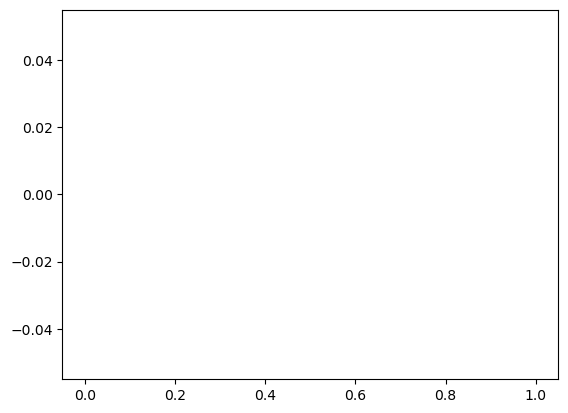

In [215]:


plt.hist(df['Income package '])
plt.show() 

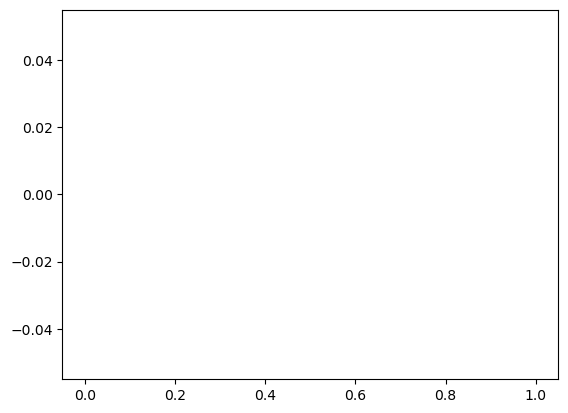

In [216]:

plt.hist(df['MonthlyIncome'])
plt.show() 

In [217]:
df[['Income package ','MonthlyIncome']]

,Income package,MonthlyIncome


In [218]:
df[(df['Age']>40) & (df['BusinessTravel'] =='Travel_Rarely') | (df['DailyRate']>500)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range


In [219]:
df[['MonthlyIncome','Income package ']][df['Income package ']=='platinum']

,MonthlyIncome,Income package


In [152]:
single_dim_arr = [1,2,3,4,5]
two_dim_arr = [[1,2,3],[4,5,6],[7,8,9]]

three_dim_arrr = [[[1,2],[3,4]],[[4,5,4,5,6,7,8,9,76,65],[5,2]],[[7,8,8],[4,5,6,7]]]

In [154]:
# three_dim_arr = [[[],[]],[[1,2,3,4],[]]]
three_dim_arrr[1][0][8]


76

In [156]:
midx = pd.MultiIndex(levels=[['llama', 'cow', 'falcon'],
                             ['speed', 'weight', 'length']],
                     codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
                            [0, 1, 2, 0, 1, 2, 0, 1, 2]])
df2 = pd.DataFrame(index=midx, columns=['big', 'small'],
                  data=[[45, 30], [200, 100], [1.5, 1], [30, 20],
                        [250, 150], [1.5, 0.8], [320, 250],
                        [1, 0.8], [0.3, 0.2]])
# midx
df2

big  small
llama  speed    45.0   30.0
       weight  200.0  100.0
       length    1.5    1.0
cow    speed    30.0   20.0
       weight  250.0  150.0
       length    1.5    0.8
falcon speed   320.0  250.0
       weight    1.0    0.8
       length    0.3    0.2

In [159]:
df2.drop(index=('llama', 'weight'))

big  small
llama  speed    45.0   30.0
       length    1.5    1.0
cow    speed    30.0   20.0
       weight  250.0  150.0
       length    1.5    0.8
falcon speed   320.0  250.0
       weight    1.0    0.8
       length    0.3    0.2

## DATA formating
We will now separate the numeric columns from the categorical columns.
As you know, Pandas data frame can have multiple columns, thus when a certain column doesn’t have a specified kind of data, i.e., doesn’t have a certain data type, but contains mixed data, i.e., numeric as well as string values, then that column is tend to have mixed data type.

#### Causes of mixed data types
Missing Values (NaN)

Inconsistent Formatting

Data Entry Errors

In [160]:
df.dtypes

Age                          float64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome             float64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [220]:
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))

Age : floating
Attrition : empty
BusinessTravel : empty
DailyRate : integer
Department : empty
DistanceFromHome : floating
Education : integer
EducationField : empty
EmployeeCount : integer
EmployeeNumber : integer
EnvironmentSatisfaction : integer
Gender : empty
HourlyRate : integer
JobInvolvement : integer
JobLevel : integer
JobRole : empty
JobSatisfaction : integer
MaritalStatus : empty
MonthlyIncome : integer
MonthlyRate : integer
NumCompaniesWorked : integer
Over18 : empty
OverTime : empty
PercentSalaryHike : integer
PerformanceRating : integer
RelationshipSatisfaction : integer
StandardHours : integer
StockOptionLevel : integer
TotalWorkingYears : integer
TrainingTimesLastYear : integer
WorkLifeBalance : integer
YearsAtCompany : integer
YearsInCurrentRole : integer
YearsSinceLastPromotion : integer
YearsWithCurrManager : integer
index_backwards : integer
Agerange1 : categorical
Agerange6 : categorical
Agerange2 : categorical
Agerange5 : categorical
age ranges 3 : categorical
Inco

In [221]:

# df.select_dtypes('object')
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'index_backwards', 'Income package '],
      dtype=object)

In [222]:
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime',
       'Agerange1', 'Agerange6', 'Agerange2', 'Agerange5', 'age ranges 3',
       'Age range'], dtype=object)

## How to deal with mixed types in Pandas columns

#### Using astype() function:
A crucial function in Pandas which is used to cast an object to a specified data type is known as astype() function. In this way, we will see how we can fix mixed data types using astype() function.

In [223]:
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.5]], columns=['Name', 'Age'])
 
data_frame

,Name,Age
0,tom,10
1,nick,15
2,juli,14.5


In [224]:
# Traverse data frame to detect data types after fix
for column in data_frame.columns:
    print(column,':',pd.api.types.infer_dtype(data_frame[column]))

Name : string
Age : mixed-integer


In [225]:
# Transforming mixed data types to single data type
data_frame["Age"] = data_frame["Age"].astype(int)
data_frame

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [226]:
 
# Traverse data frame to detect data types after fix
for column in data_frame.columns:
    print(column,':',pd.api.types.infer_dtype(data_frame[column]))

Name : string
Age : integer


#### Using to_numeric() function:
The to_numeric() function is used to convert an argument to a numeric data type. In this way, we will see how we can fix mixed data types using to_numeric() function.

In [227]:
# Create the pandas DataFrame
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.4]], columns=['Name', 'age'])
 
# Transforming mixed data types to single data type
data_frame["age"] = data_frame["age"].apply(lambda x: pd.to_numeric(x, errors = 'ignore'))
 
# Traverse data frame to detect data types after fix
for column in data_frame.columns:
    print(pd.api.types.infer_dtype(data_frame[column]))

string
floating


In [228]:
data_frame['age'] = data_frame["age"].apply(lambda x: pd.to_numeric(x, errors = 'ignore',)).astype(float)
print(data_frame['age'])

0    10.0
1    15.0
2    14.4
Name: age, dtype: float64


# Missingno

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram. The original publication for the library can be found https://joss.theoj.org/papers/10.21105/joss.00547

pip install missingno

In [231]:
# !pip install missingno
import missingno as msno

In [233]:
df1=pd.read_csv('missing_values_data_auto_mpg.csv')
df1copy=df1.copy()
df1copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140,NaN,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86,NaN,15.6,NaN,1,ford mustang gl
394,44.0,4.0,97.0,52,2130.0,24.6,82.0,2,vw pickup
395,32.0,4.0,135.0,84,NaN,11.6,82.0,1,dodge rampage
396,28.0,4.0,120.0,79,2625.0,18.6,82.0,1,ford ranger


<Axes: >

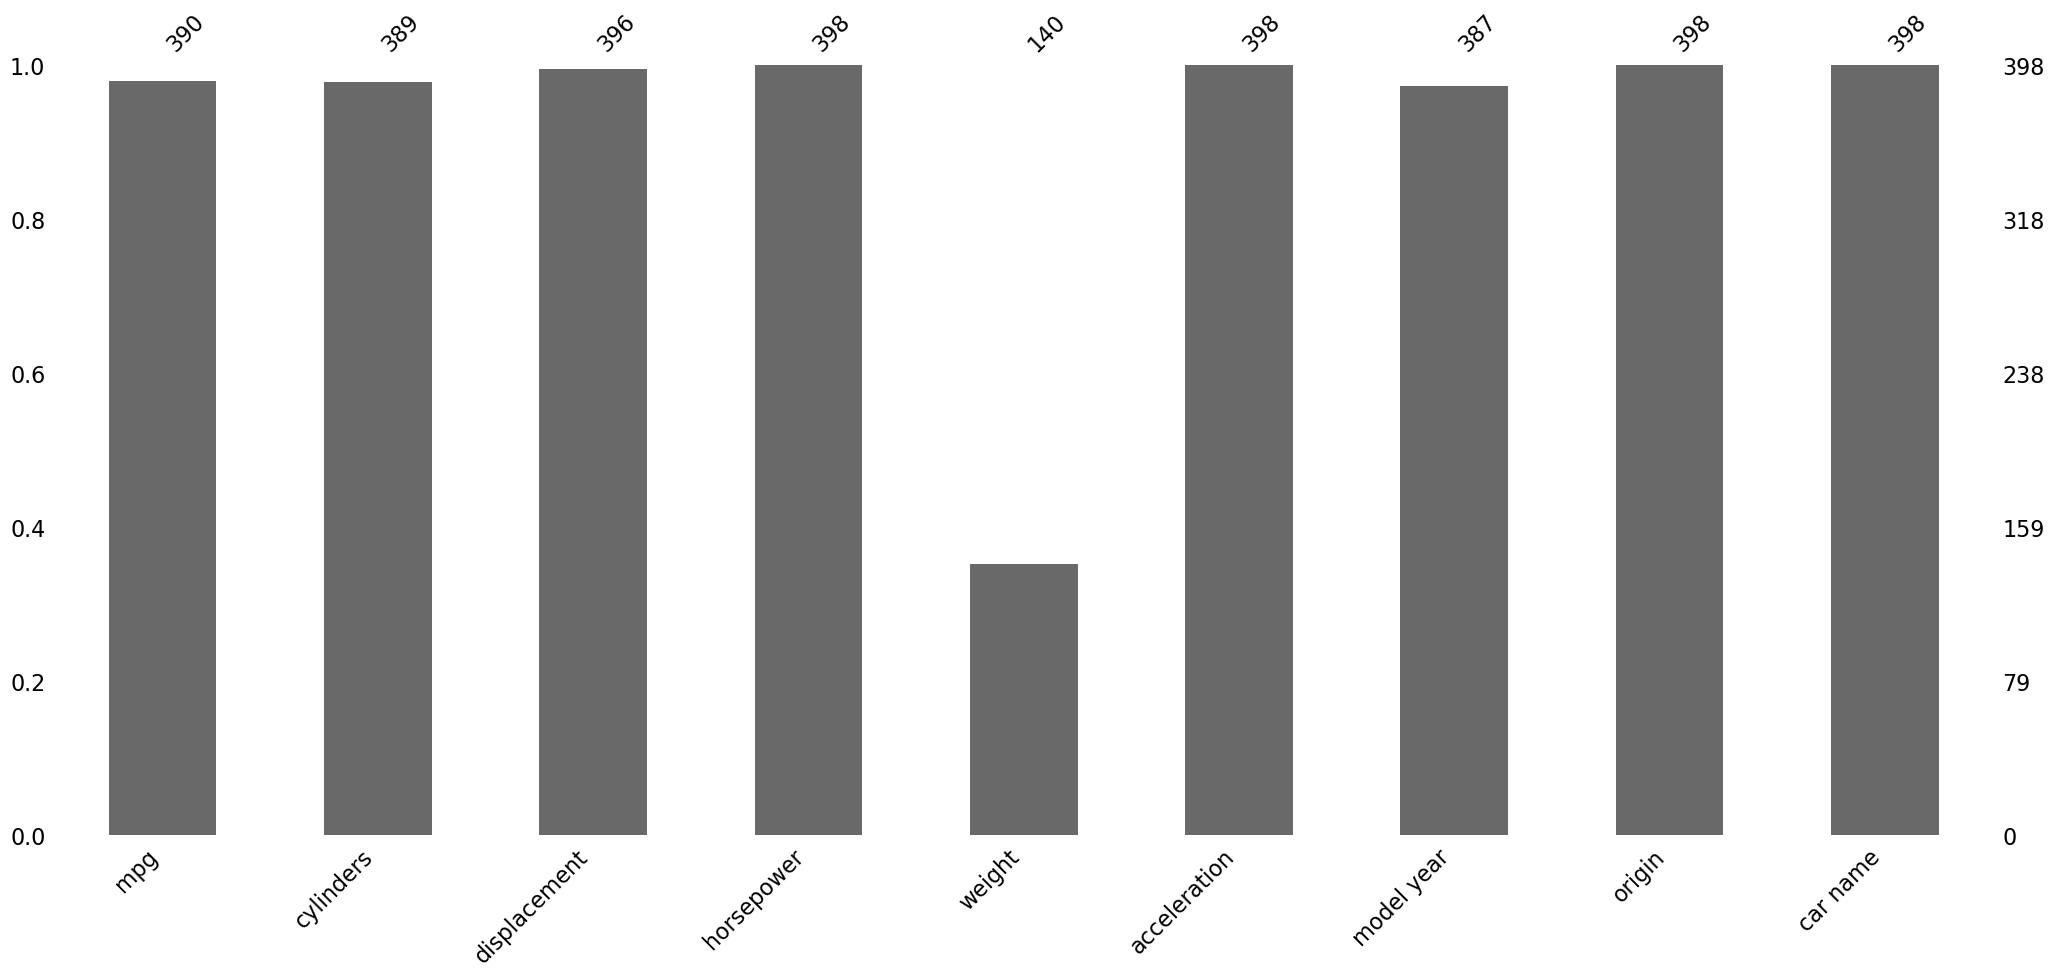

In [239]:
bar=msno.bar(df1)
bar

### Percentage of missing Values





In [240]:
# % of valumes missing in each colun
values_list = list()
cols_list = list()
for col in df1.columns:
    perc_missing = np.mean(df1[col].isnull())*100
    cols_list.append(col)
    values_list.append(perc_missing)
perc_missing_df1 = pd.DataFrame()
perc_missing_df1['column'] = cols_list
perc_missing_df1['perc_missing'] = values_list


In [241]:
perc_missing_df1

,column,perc_missing
0,mpg,2.010050
1,cylinders,2.261307
2,displacement,0.502513
3,horsepower,0.000000
4,weight,64.824121
5,acceleration,0.000000
6,model year,2.763819
7,origin,0.000000
8,car name,0.000000


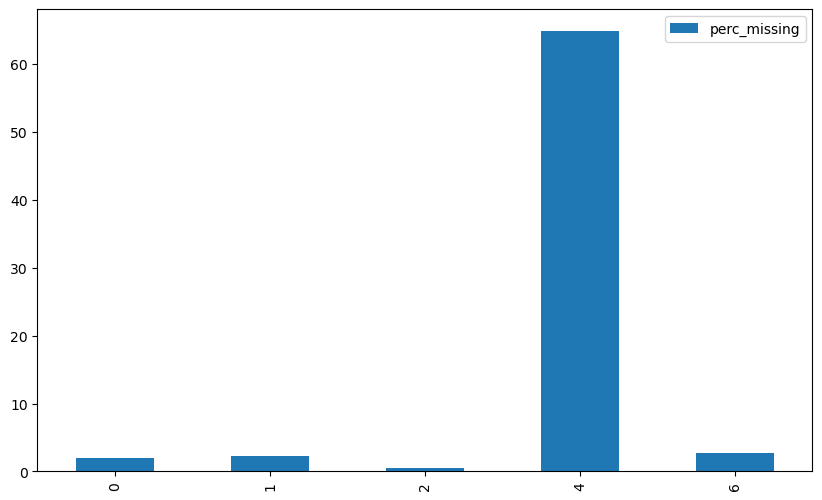

In [242]:
perc_missing_df1.loc[perc_missing_df1.perc_missing > 0].plot(kind='bar', figsize=(10,6))
plt.show()


<Axes: >

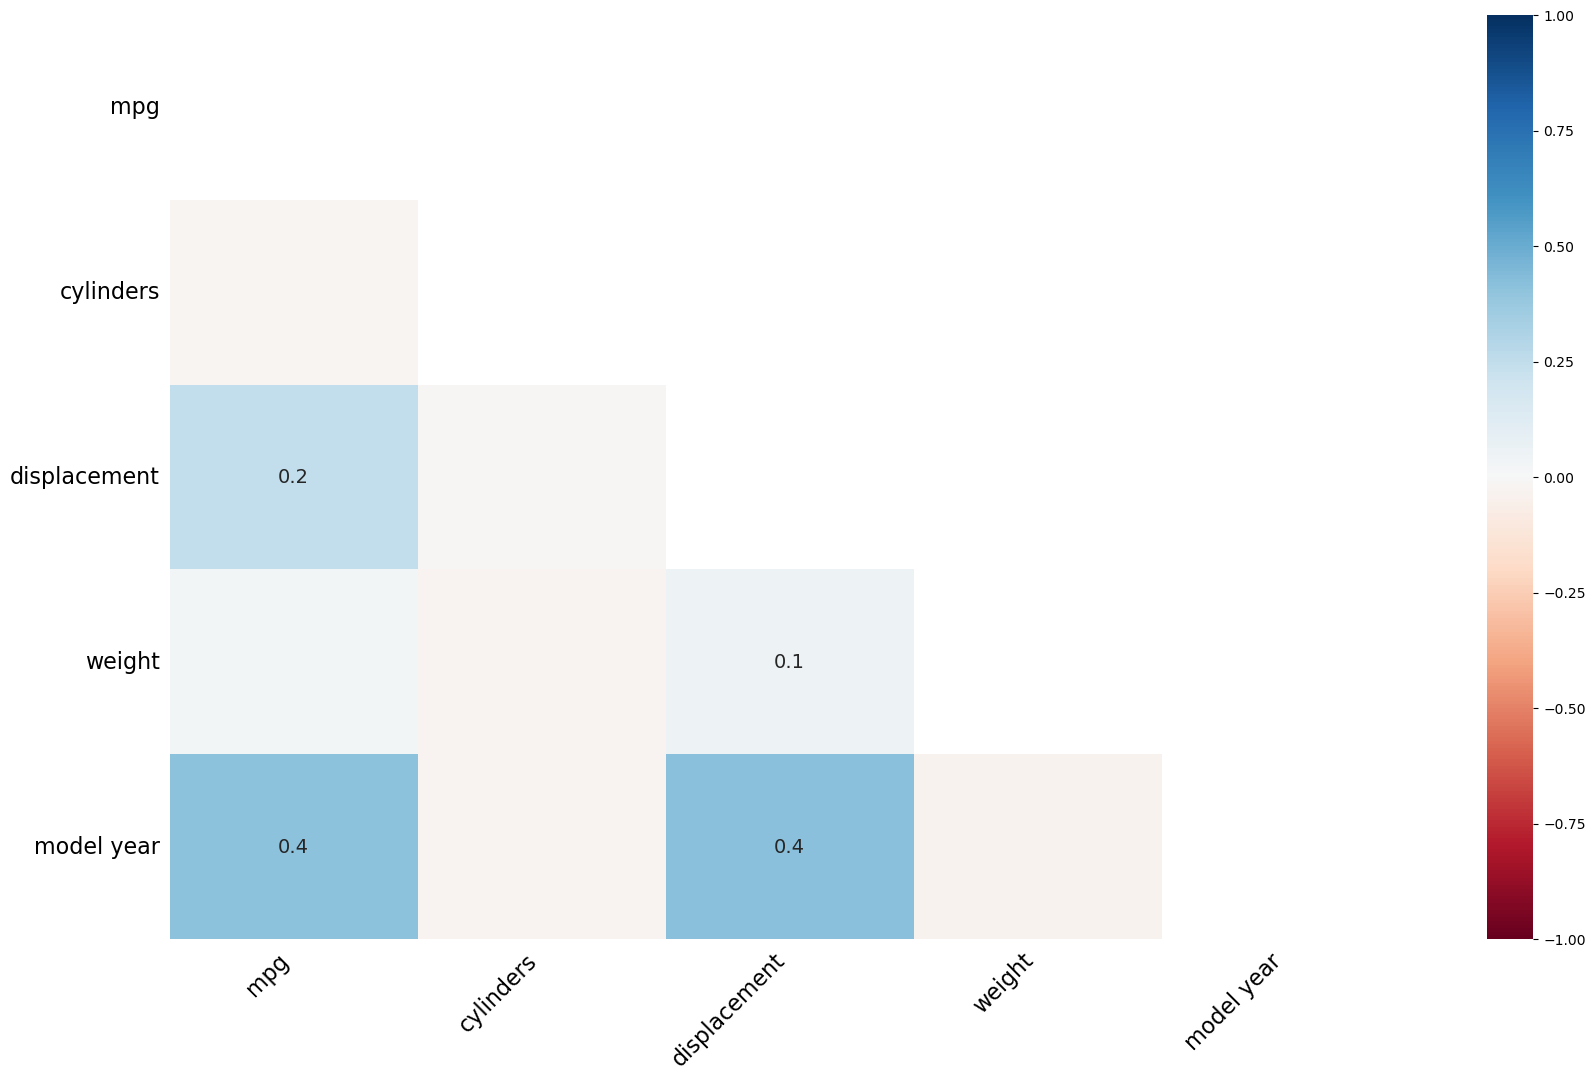

In [243]:
msno.heatmap(df1)

<Axes: >

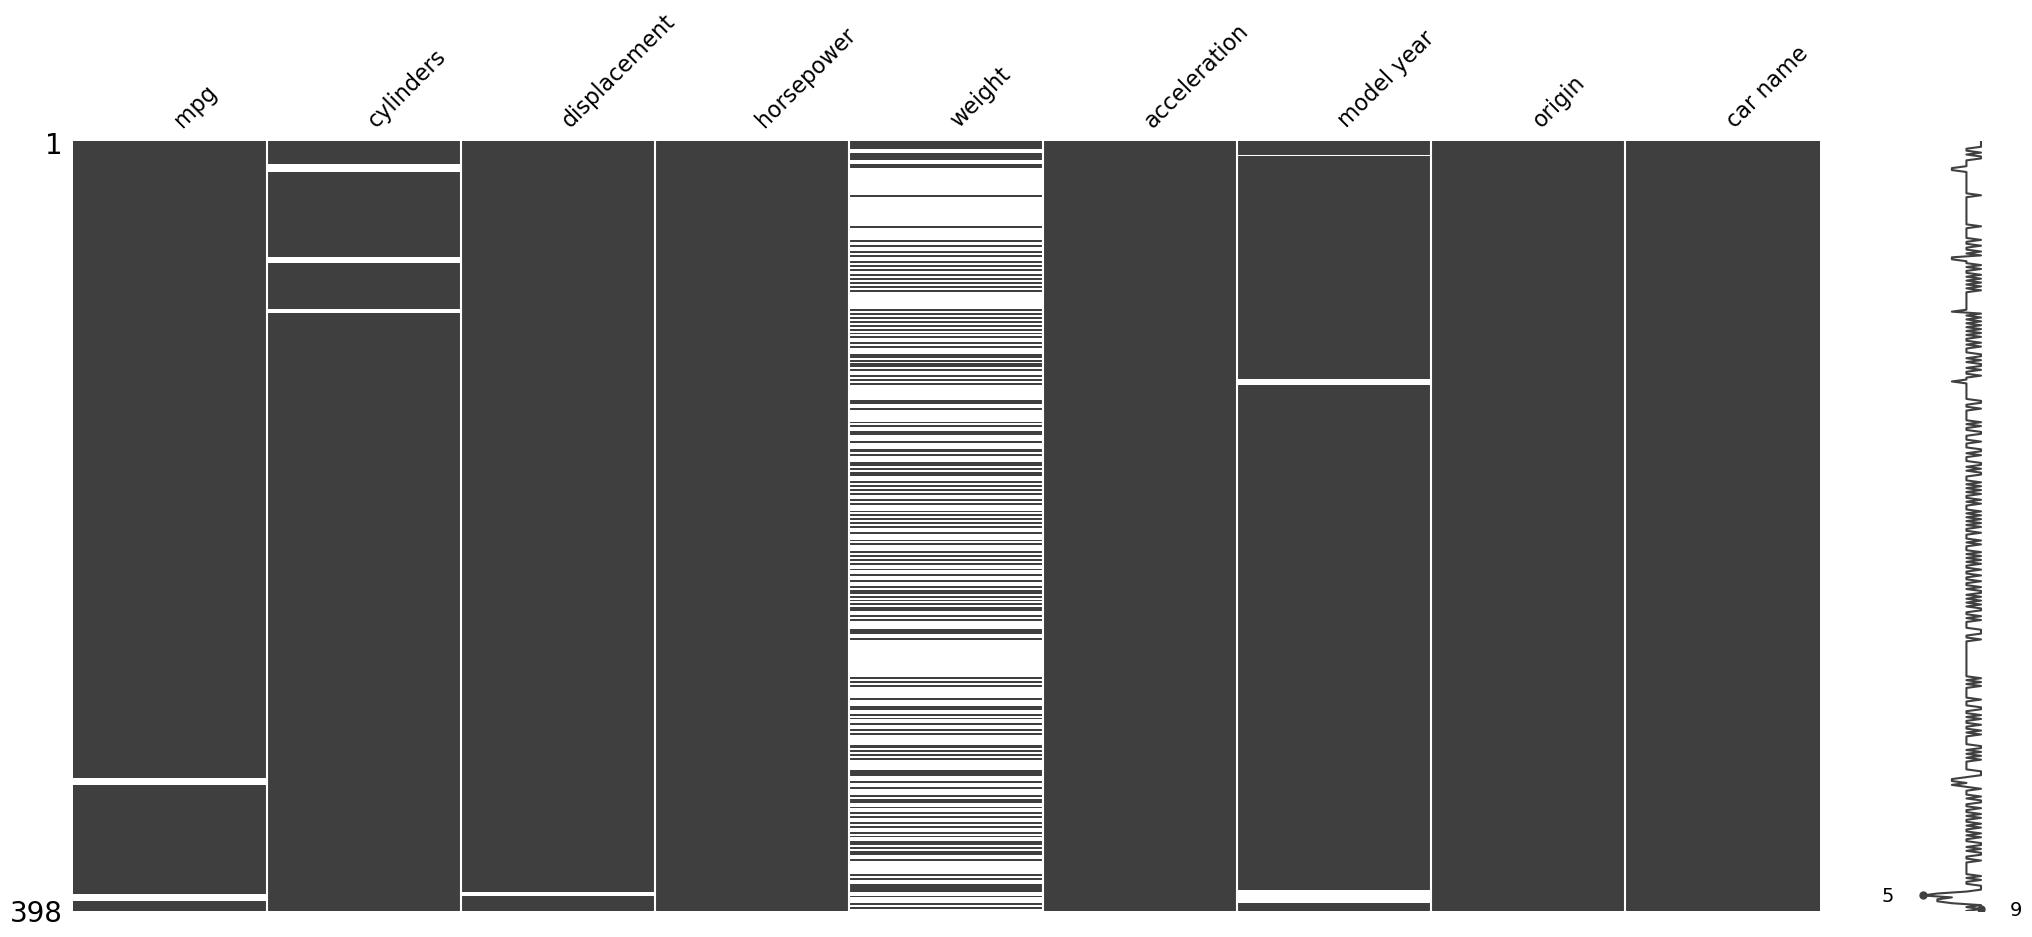

In [244]:
msno.matrix(df1)

<Axes: >

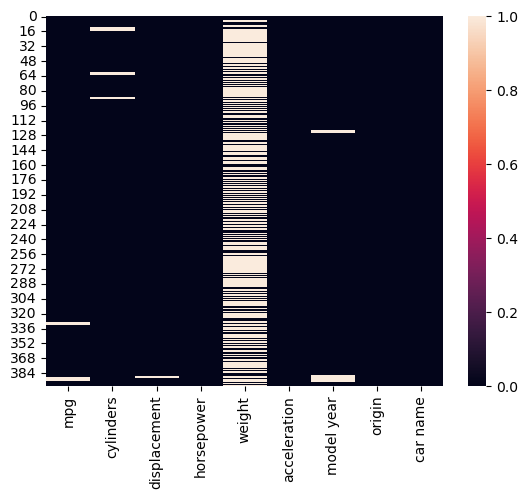

In [245]:
import seaborn as sns
null_val_of_df1 = df1.isna()
sns.heatmap(null_val_of_df1)

Well, if the column names are not easily readable you can always create its transposed version as below.

<Axes: >

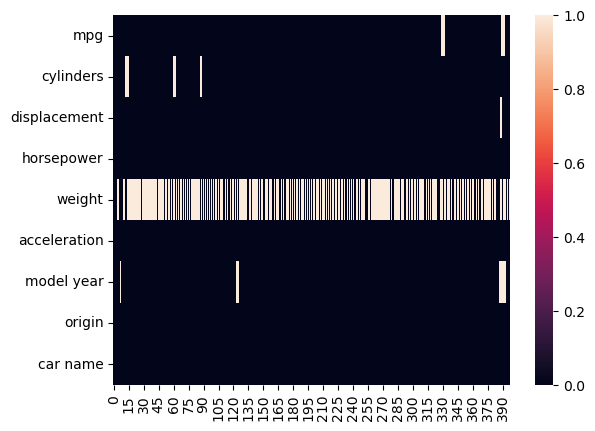

In [246]:
sns.heatmap(null_val_of_df1.transpose())

Although heatmaps gives you an idea about the location of the missing data, it does not tell you about the amount of missing data

Missing data as a percentage of total data
There is no straightforward method to get it, but all you can use is the .isna() method and below a piece of code

In [249]:

print("Amount of missing values in - ")
for column in df1.columns:
    percentage_missing = np.mean(df1[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
mpg : 2%
cylinders : 2%
displacement : 1%
horsepower : 0%
weight : 65%
acceleration : 0%
model year : 3%
origin : 0%
car name : 0%


## Treating missing values 

#### Based on above observations you can use any of the below 3 methods to handle missing data.

Drop the record — Drop an entire record at an index, when a specific column has a missing value or NaN at it. Please be aware that this technique can drastically reduce the number of records in the dataset if the mentioned column has a huge number of missing values.
Drop the column or feature — This needs good research of a specific column to understand its importance in the future. You can do this only when you are confident that this feature does not provide any useful information, for example, PassengerId feature in this dataset.
Impute missing data—In this technique, you can substitute the missing values or NaNs with the mean or median or mode of the same column.

It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the performance of the machine learning model, as it can impact the relationships between variables in the dataset.


Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.

Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

## Remove columns (features)
Another way to tackle missing values in a dataset would be to drop those columns or features that have a significant percentage of values missing. Such columns don’t contain a lot of information and can be dropped altogether from the dataset. In our case, let us drop all those columns that have more than 40% values missing in them.

<Axes: >

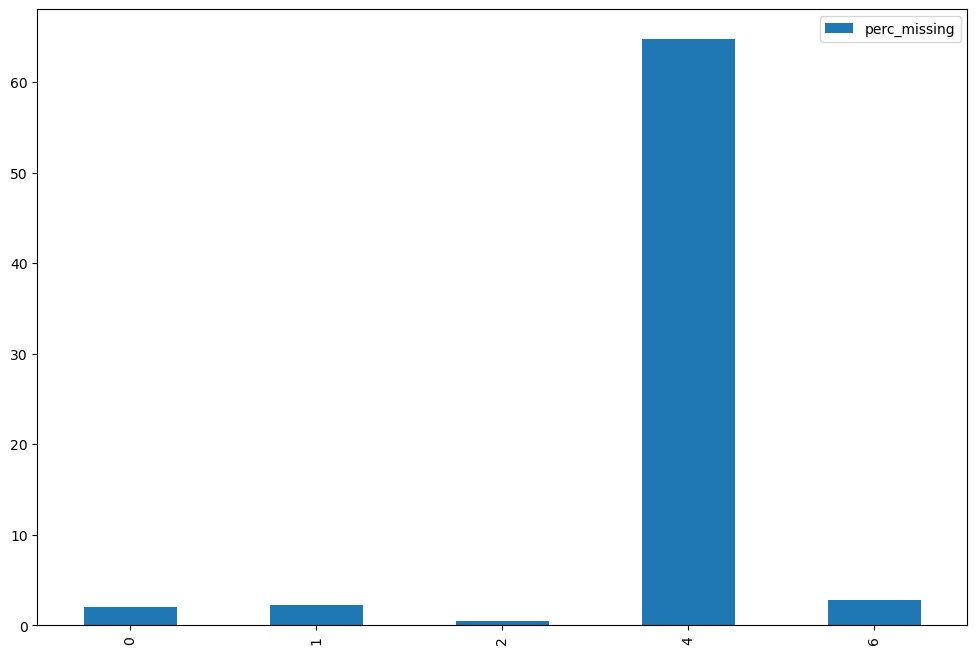

In [250]:
perc_missing_df1.loc[perc_missing_df1.perc_missing > 0].plot(kind='bar', figsize=(12,8))

In [251]:

_40_pct_missing_cols_list = list(perc_missing_df1.loc[perc_missing_df1.perc_missing > 40].values)
_40_pct_missing_cols_list

[array(['weight', 64.82412060301507], dtype=object)]

### Using mean
Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.

One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column. In the case of fields like salary, the data may be skewed as shown in the previous section. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. Note that imputing missing data with mean values can only be done with numerical data.

In [252]:
df1copy.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [255]:
df1copy['weight'].isna().sum()

258

In [256]:
df1rsha=df1copy['weight'].mean()
df1rsha

3030.2214285714285

In [258]:
df1copy['weight']=df1copy['weight'].fillna(df1copy['weight'].mean())
df1copy['weight']

0      3504.000000
1      3693.000000
2      3436.000000
3      3433.000000
4      3030.221429
          ...     
393    3030.221429
394    2130.000000
395    3030.221429
396    2625.000000
397    3030.221429
Name: weight, Length: 398, dtype: float64

In [259]:
df1copy['weight'].isna().sum()

0

In [260]:
print(df1copy['weight'].unique())

[3504.         3693.         3436.         3433.         3030.22142857
 4354.         4312.         4425.         3850.         3761.
 3086.         4732.         5140.         2074.         1613.
 2278.         2254.         4274.         4135.         3672.
 4456.         2330.         4098.         4077.         2511.
 3988.         3777.         4464.         4237.         4951.
 3121.         2945.         2904.         4906.         4499.
 2379.         2124.         2472.         4082.         4278.
 2158.         3399.         2807.         3102.         3632.
 3613.         4457.         2003.         2108.         2391.
 2000.         3158.         4657.         3907.         3730.
 3169.         2171.         2914.         2702.         2223.
 3211.         2957.         2671.         2464.         2255.
 4215.         3233.         3012.         2035.         1937.
 3651.         3193.         2565.         3940.         4380.
 3870.         2045.         1825.         3880

In [261]:
df1copy['weight']

0      3504.000000
1      3693.000000
2      3436.000000
3      3433.000000
4      3030.221429
          ...     
393    3030.221429
394    2130.000000
395    3030.221429
396    2625.000000
397    3030.221429
Name: weight, Length: 398, dtype: float64

### Impute / Replace Missing Values with Median
Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data

In [262]:
dfmedian=df.fillna(df.median(numeric_only=True))

dfmedian

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range


In [263]:
print("Max ------->",df1copy['weight'].max())


Max -------> 5140.0


In [270]:
print("Min ------->",df1copy['weight'].min())



Min -------> 1613.0


In [271]:
print("Unique ------->",df1copy['weight'].unique())


Unique -------> [3504.         3693.         3436.         3433.         3030.22142857
 4354.         4312.         4425.         3850.         3761.
 3086.         4732.         5140.         2074.         1613.
 2278.         2254.         4274.         4135.         3672.
 4456.         2330.         4098.         4077.         2511.
 3988.         3777.         4464.         4237.         4951.
 3121.         2945.         2904.         4906.         4499.
 2379.         2124.         2472.         4082.         4278.
 2158.         3399.         2807.         3102.         3632.
 3613.         4457.         2003.         2108.         2391.
 2000.         3158.         4657.         3907.         3730.
 3169.         2171.         2914.         2702.         2223.
 3211.         2957.         2671.         2464.         2255.
 4215.         3233.         3012.         2035.         1937.
 3651.         3193.         2565.         3940.         4380.
 3870.         2045.         18

In [277]:
print("num Unique ------->",df1copy['weight'].nunique())

num Unique -------> 137


### Impute / Replace Missing Values with Mode
Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values. For data points such as the salary field, you may consider using mode for replacing the values. Note that imputing missing data with mode values can be done with numerical and categorical data.

In [278]:
#categorical column
for columns in df:
    df[columns] = df[columns].fillna(df[columns].mode()[0])
    
print(df.isna().sum())


KeyError: 0

In [281]:
df.head(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range


###  Removing Rows with Null Values

In [282]:
dfremoved = df.dropna(axis=0)
dfremoved.shape

(0, 43)

### Replacing with the previous value – forward fill
In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. This is called forward fill. It is mostly used in time series data. You can use the ‘fillna’ function with the parameter ‘method = ffill’

In [283]:
df1copy.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [285]:
df1copy.weight=df1copy.weight.fillna('ffill')
df1copy.weight.isnull().sum()


0

## Replacing with the next value – backward fill

In backward fill, the missing value is imputed using the next value.

In [286]:
df1copy.mpg=df1copy.mpg.fillna('bfill')
df1copy.mpg.isnull().sum()

0

# Conditional selection
So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.# Cleaning your dataset

In [287]:
df.loc[(df.Department == 'Research & Development') & (df.Education == 2)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range


In [288]:

df["current status"]='employed'
df['current status']

Series([], Name: current status, dtype: object)

In [289]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'index_backwards', 'Agerange1', 'Agerange6',
       'Agerange2', 'Agerange5', 'age ranges 3', 'Income package ',
       'Age range', 'current status'],
      dtype='object')

In [306]:
# df = pd.read_csv()
x = df.loc[:,0:2]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

In [307]:
df.loc[df.EducationField.isin(['Medical','Life Sciences'])]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,index_backwards,Agerange1,Agerange6,Agerange2,Agerange5,age ranges 3,Income package,Age range,current status


## date time formating

Example 1: Get Current Date and Time

In [308]:
import datetime

# get the current date and time
now = datetime.datetime.now()

print(now)

2025-01-14 21:34:43.132602


In [309]:
#Example 2: Get Current Date


# get current date
current_date = datetime.date.today()

print(current_date)

2025-01-14


Attributes of datetime Module
We can use the dir() function to get a list containing all attributes of a module.

Among all the attributes of datetime module, the most commonly used classes in the datetime module are:

datetime.datetime - represents a single point in time, including a date and a time.

datetime.date - represents a date (year, month, and day) without a time.

datetime.time - represents a time (hour, minute, second, and microsecond) without a date.

datetime.timedelta - represents a duration, which can be used to perform arithmetic with datetime objects.
https://www.programiz.com/python-programming/datetime

In [310]:
import datetime

print(dir(datetime))

['MAXYEAR', 'MINYEAR', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


In [311]:
# Print today's year, month and day
from datetime import date

# date object of today's date
today = date.today() 

print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2025
Current month: 1
Current day: 14


In [312]:
from datetime import datetime

a = datetime(2022, 12, 28, 23, 55, 59, 342380)

print("Year =", a.year)
print("Month =", a.month)
print("Hour =", a.hour)
print("Minute =", a.minute)
print("Timestamp =", a.timestamp())

Year = 2022
Month = 12
Hour = 23
Minute = 55
Timestamp = 1672253759.34238


### Python format datetime
Python strftime() Method

The strftime() method is defined under classes date, datetime and time. The method creates a formatted string from a given date, datetime or time object.

In [313]:
from datetime import datetime

# current date and time
now = datetime.now()

t = now.strftime("%H:%M:%S")
print("Time:", t)

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

Time: 21:34:49
s1: 01/14/2025, 21:34:49
s2: 14/01/2025, 21:34:49


# Analyzing relationships between variables

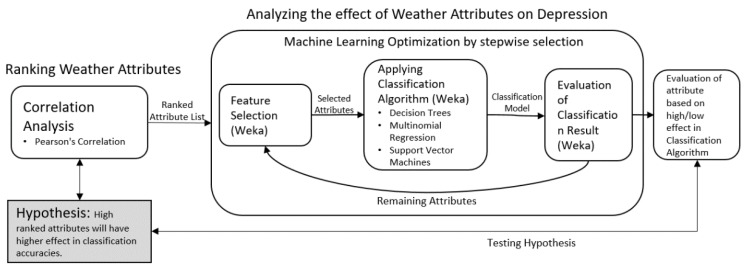

## correlation matrix 
The first thing I like to do when analyzing my variables is visualizing it through a correlation matrix because it’s the fastest way to develop a general understanding of all of my variables. To review, correlation is a measurement that describes the relationship between two variables — if you want to learn more about it, you can check out my statistics cheat sheet here.) Thus, a correlation matrix is a table that shows the correlation coefficients between many variables. I used sns.heatmap() to plot a correlation matrix of all of the variables

range = -1 to 1

correlation of +/- 0.7 represents a strong relationship between two variables

correlations between -0.3 and 0.3 indicate that there is little to no relationship between variables.

https://terenceshin.medium.com/week-2-52-stats-cheat-sheet-ae38a2e5cdc6

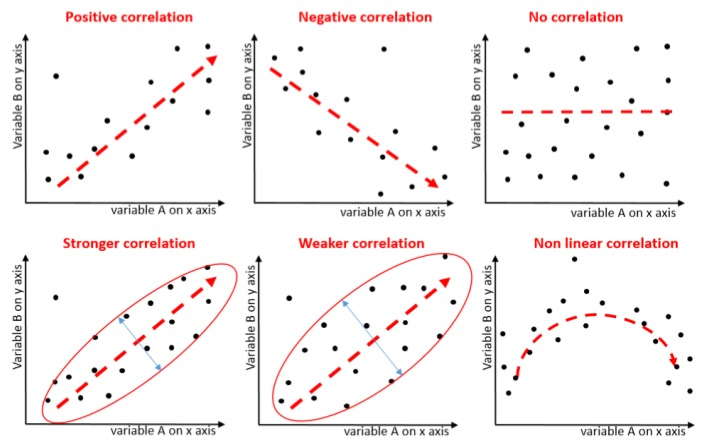

C:\Users\Fawad\AppData\Local\Temp\ipykernel_23116\2645613920.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<Axes: >

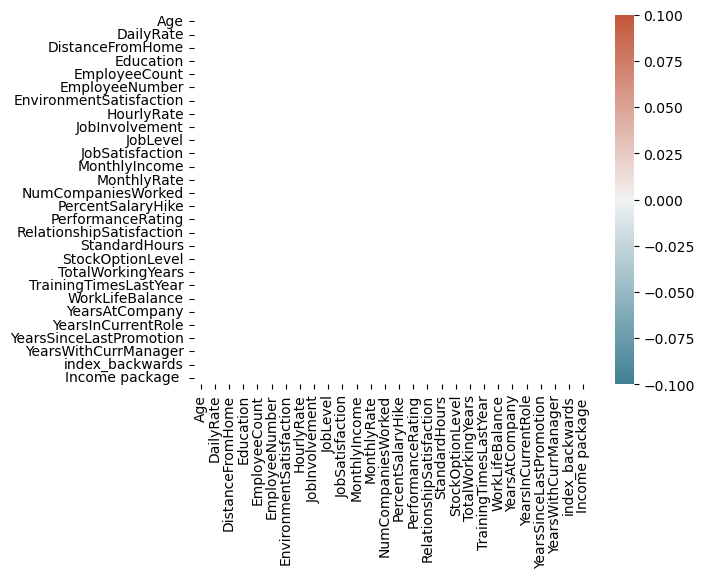

In [315]:

corr = df.corr()# plot the heatmap
corheat=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
corheat

## sns.pairplot()
is a great way to create scatterplots between all of your variables.

In [ ]:

pairs=sns.pairplot(df)
pairs

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:1310: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


## Boxplot
Another way to visualize the distribution of a variable is a boxplot.
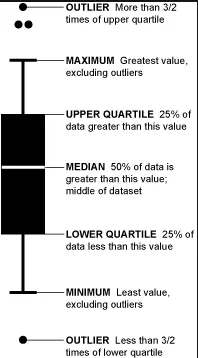

In [ ]:
dfnum=df.select_dtypes(['int64','float64'])
dfnum

In [ ]:
dften=sns.boxplot(df['Age'])
dften       
    

## Pandas profiling

the Pandas package in Python is highly equipped to perform various kinds of EDA. Here, I will introduce the pandas profiling, which can effectively perform a comprehensive EDA within 3 lines of code within Jupyter Notebooks or JupyterLab.

! pip install pandas-profiling

import pandas_profiling 
import pandas as pd


x=ProfileReport(df)
x